In [1]:
# Importing necessary libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("calories_consumed.csv")
d= {"Weight gained (grams)":"weight","Calories Consumed":"calories"}
df.rename(columns = d, inplace = True)
df.head()

weight  calories
0     108      1500
1     200      2300
2     900      3400
3     200      2200
4     300      2500

In [3]:
df.describe()

weight     calories
count    14.000000    14.000000
mean    357.714286  2340.714286
std     333.692495   752.109488
min      62.000000  1400.000000
25%     114.500000  1727.500000
50%     200.000000  2250.000000
75%     537.500000  2775.000000
max    1100.000000  3900.000000

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

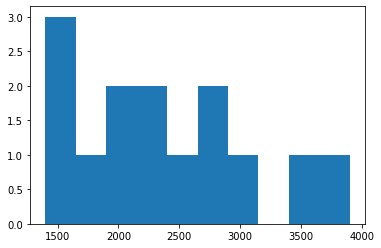

In [4]:
plt.hist(df.calories) #histogram


{'whiskers': [<matplotlib.lines.Line2D at 0x23bd6c7bcc8>,
 'caps': [<matplotlib.lines.Line2D at 0x23bd6d36e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x23bd6d33808>],
 'medians': [<matplotlib.lines.Line2D at 0x23bd6d3c948>],
 'fliers': [<matplotlib.lines.Line2D at 0x23bd6d3cf88>],
 'means': []}

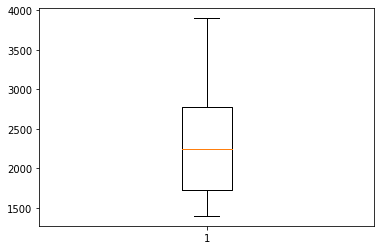

In [5]:
plt.boxplot(df.calories) #boxplot

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

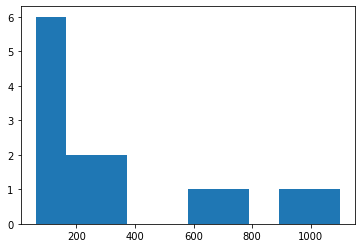

In [6]:
plt.hist(df.weight) #histogram

In [7]:
plt.boxplot(df.weight) #boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x23bd6e2ac08>,
 'caps': [<matplotlib.lines.Line2D at 0x23bd6e2dbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23bd6e23fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x23bd6e31a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23bd6e31bc8>],
 'means': []}

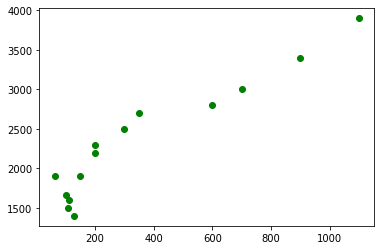

In [8]:
plt.scatter(x = df['weight'], y = df['calories'], color = 'green') 

In [9]:
np.corrcoef(df.calories, df.weight)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [10]:
cov_output = np.cov(df.calories, df.weight)[0, 1]
cov_output

237669.4505494506

In [11]:
# Simple Linear Regression
model = smf.ols('weight ~ calories', data = df).fit()
model.summary()

C:\Users\Murali\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.86e-07
Time:                        20:43:59   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
calories       0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
pred1 = model.predict(pd.DataFrame(df['calories']))

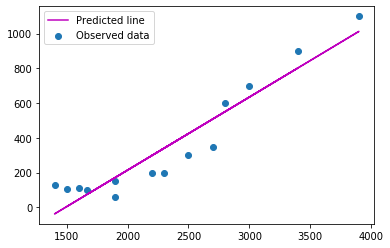

In [13]:
# Regression Line
plt.scatter(df.calories, df.weight)
plt.plot(df.calories, pred1, "m")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [14]:
# Error calculation
res1 = df.weight - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

103.30250194726932

In [15]:
######### Model building on Transformed Data
# Log Transformation
# x = log(calories); y = weight

plt.scatter(x = np.log(df['calories']), y = df['weight'], color = 'r')
np.corrcoef(np.log(df.calories), df.weight) #correlation

model2 = smf.ols('weight ~ np.log(calories)', data = df).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(df['calories']))

C:\Users\Murali\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


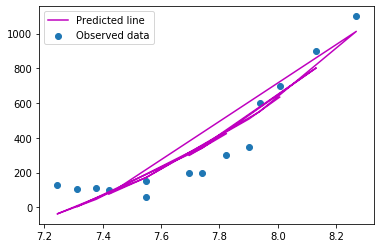

In [18]:
# Regression Line
plt.scatter(np.log(df.calories), df.weight)
plt.plot(np.log(df.calories), pred1, "m")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [17]:
# Error calculation
res2 = df.weight - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

141.00538169425104